<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/15)_%EB%A7%88%EC%BC%80%ED%8C%85_%EC%BA%A0%ED%8E%98%EC%9D%B8_%EB%B0%98%EC%9D%91%EA%B3%A0%EA%B0%9D_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 마케팅 캠페인 반응고객 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 캠페인 반응률 분석  
2) 마케팅 반응 여부에 따른 고객 특성  
3) ML 활용 마케팅 반응고객 예측

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter15')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter15' ← 변경X
# os.getcwd()

Mounted at /content/drive


## 문제상황 및 데이터 살펴보기
---
>**시나리오**

```
A마트는 온/오프라인으로 다양한 채널에서 고객 마케팅을 수행하고 있다. 두 채널에 대한 Mass 마케팅을 운영하다 보니 마케팅 비용이 과다하게  
발생하고 있다. 마케팅 비용 절감을 위해 마케팅 반응 가능성이 높은 고객 대상으로 타겟 마케팅을 수행하고자 한다.

```  

> **데이터 살펴보기**

* 마케팅 캠페인 관련 데이터
* 데이터 명세 ⬇

|ID|Year_Birth|Education|Marital_Status|Income|Kidhome|
|:---:|:---:|:---:|:---:|:---:|:---:|
|고객ID|출생년도|교육수준|결혼여부|수입|어린이명|
|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|
|청소년명|고객등록일|마지막구입일로부터 경과일|최근2년 와인구매량|최근2년 과일구매량|최근2년 고기구매량|
|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|
|최근2년 생선구매량|최근2년 제과구매량|최근2년 보석구매량|할인 구매횟수|온라인 구매횟수|카탈로그이용 구매횟수|
|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|
|오프라인구매횟수|월 웹사이트 방문횟수|3번째 캠페인 반응여부|4번째 캠페인 반응여부|5번째 캠페인 반응여부|1번째 캠페인 반응여부|
|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
|2번째 캠페인 반응여부|컴플레인 여부|고객연락비용|마케팅수익|최종 마케팅 반응여부|


In [3]:
# Data read
import pandas as pd
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter15_마케팅 캠페인 반응고객 예측/'
df = pd.read_csv(bath + 'chapter15_marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 문제해결 프로세스 정의
---

>**문제정의**

```
- 온/오프라인 대상 Mass 마케팅으로 인한 마케팅 비용 과다 발생
```

>**기대효과**

```
- 타겟 마케팅으로 마케팅 비용 절감
```

>**해결방안**

```
- 마케팅 반응 가능성 모델링을 통해 타겟 마케팅 수행
- Data 전처리 및 고객 등록일, 시간 데이터 활용 전처리, 캠페인 반응률 분석
- Numeric, Categorical 변수별 캠페인 반응률 분석
- ML 알고리즘 활용 캠페인 반응 가능성 높은 고객 예측
```

>**성과측정**

```
- 타겟마케팅 전/후 마케팅 비용 대비 반응률
```

>**현업적용**

```
- 매 월 Model에 Input 하기 위한 Data mart 생성
- 매 월 Model을 활용하여 마케팅 가능 모수 추출
- 실험군/대조군 설정하여 마케팅 수행 후 반응률 Gap 검증
```



## Session 1
## 캠페인 반응률 분석

### Data 전처리
---

In [4]:
# Data Shape
# 2240 row, 29 col 구성
print('df', df.shape)

df (2240, 29)


In [5]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Null 확인
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df['Income'].mean()

52247.25135379061

In [8]:
# Null 값, 평균 값으로 치환, 소득 데이터이기 때문에 0으로 처리시 ㅂ문제 발생
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [9]:
# Null 값 재확인
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
# Outlier 확인
## rows 500
pd.set_option('display.max_rows', 500)

## columns
pd.set_option('display.max_columns', 500)

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 고객 등록일(Dt_Customer) 전처리
---
* 단순한 날짜로는 사용할 수 없는 col  
* 몇 일이 경과되었는지에 대한 연속형 변수로 치환하여 사용

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [14]:
import datetime
# 2012년 7월 30일 ~ 2014년 6월 29일
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

In [17]:
# 고객등록일 마지막날 - 고객등록일 > 고객 등록 후 경과일
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x : (df['Dt_Customer'].max() - x).days)

### 캠페인 반응률 분석
---

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [20]:
# 캠페인 반응률 분석
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [21]:
# 평균 14% 반응률
334 / (1906+334)

0.14910714285714285

In [23]:
# 과거 캠페인 반응 여부와 캠페인 반응률 분석
df_mkt = df[['AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','Response' ]]
df_mkt.head()

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [24]:
# 과거 캠페인 반응 여부에 대해 모두 더한 것을 새로운 col로 정의
df_mkt['cmp_sum'] = df_mkt['AcceptedCmp5'] + df_mkt['AcceptedCmp4'] + df_mkt['AcceptedCmp3'] + df_mkt['AcceptedCmp2'] + df_mkt['AcceptedCmp1']
df_mkt.head()

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response,cmp_sum
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [29]:
# 과거에 캠페인 반응을 많이했던 고객일수록 다음 캠페인 반응률이 높을것으로 기대됨(매우 Critical한 변수)
df_mkt_gp = df_mkt.groupby('cmp_sum')['Response'].agg(['count', 'sum'])
df_mkt_gp['ratio']=round((df_mkt_gp['sum']/df_mkt_gp['count'])*100, 1)
df_mkt_gp.head()

,count,sum,ratio
cmp_sum,,,
0,1777,146,8.2
1,325,101,31.1
2,83,42,50.6
3,44,35,79.5
4,11,10,90.9


## Session 2
## 마케팅 반응 여부에 따른 고객 특성

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [31]:
# numeric, categorical 변수 나누기
numeric_list = []
categorical_list = []

for i in df.columns:
    if df[i].dtype == 'O':
        categorical_list.append(i)
    else:
        numeric_list.append(i)

print('categorical_list :', categorical_list)
print('numeric_list :', numeric_list)

categorical_list : ['Education', 'Marital_Status']
numeric_list : ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### Numeric 변수
---

<Axes: xlabel='Dt_Customer', ylabel='Density'>

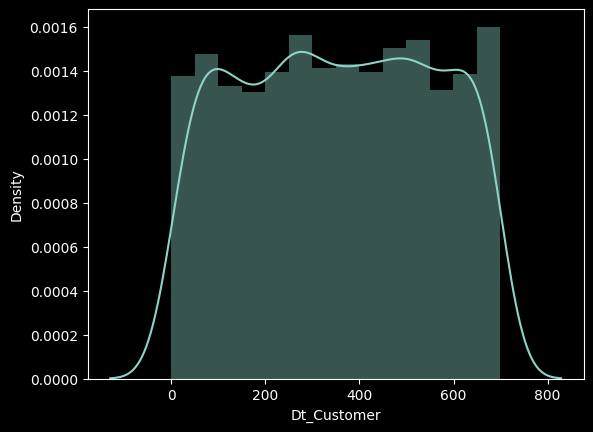

In [32]:
# 고객등록일 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Dt_Customer'])

In [34]:
# 구간화
import numpy as np
df['Dt_Customer_gp']=np.where(df['Dt_Customer'] <=200, 1,
         np.where(df['Dt_Customer']<=500, 2, 3))
df[['Dt_Customer', 'Dt_Customer_gp']].head()

,Dt_Customer,Dt_Customer_gp
0,663,3
1,113,1
2,312,2
3,139,1
4,161,1


In [36]:
# agg function을 사용해서 간단하게 표현
df_gp = df.groupby('Dt_Customer_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
Dt_Customer_gp,,,
1,618,52,8.4
2,980,121,12.3
3,642,161,25.1


<Axes: xlabel='Recency', ylabel='Density'>

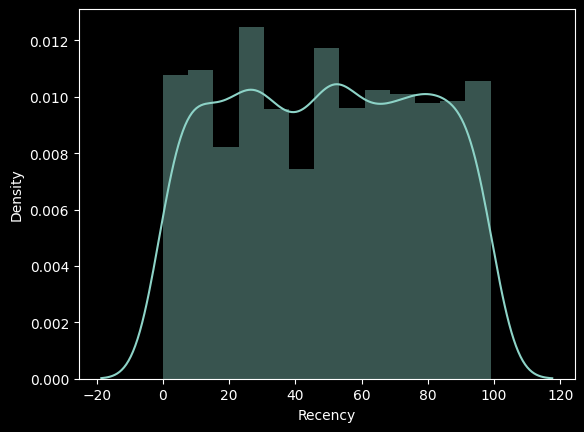

In [37]:
# 마지막 구매일로부터 경과일(Recency) 분포 확인
sns.distplot(df['Recency'])

In [38]:
# 구간화
df['Recency_gp'] = np.where(df['Recency']<=35, 1,
         np.where(df['Recency']<=65, 2, 3))
df[['Recency', 'Recency_gp']].head()

,Recency,Recency_gp
0,58,2
1,38,2
2,26,1
3,26,1
4,94,3


In [42]:
# agg function을 사용해서 간단하게 표현
df_gp = df.groupby('Recency_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
Recency_gp,,,
1,820,190,23.2
2,674,84,12.5
3,746,60,8.0


In [43]:
# kinhome 분석
df_gp = df.groupby('Kidhome')['Response'].agg(['count','sum'])
df_gp['ratio']=round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

,count,sum,ratio
Kidhome,,,
0,1293,222,17.2
1,899,110,12.2
2,48,2,4.2


### Categorical 변수
---

In [44]:
print('categorical_list:', categorical_list)

categorical_list: ['Education', 'Marital_Status']


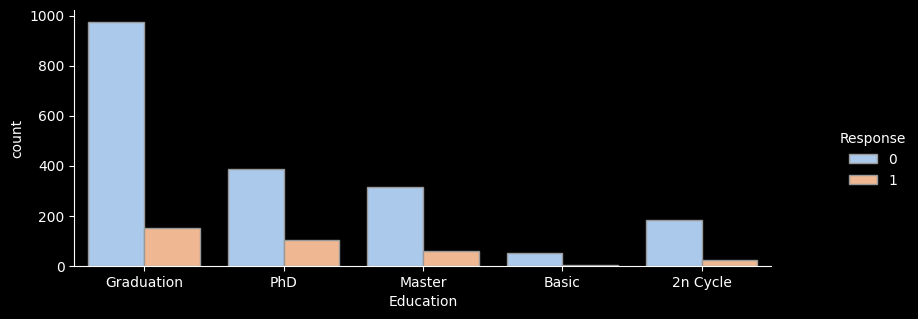

In [46]:
# 교육수준에 따른 캠페인 반응률 분석
sns.catplot(x='Education', hue='Response', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(10, 3)

In [48]:
df_gp = df.groupby('Education')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp.sort_values(by=['ratio'], ascending=False)

,count,sum,ratio
Education,,,
PhD,486,101,20.8
Master,370,57,15.4
Graduation,1127,152,13.5
2n Cycle,203,22,10.8
Basic,54,2,3.7


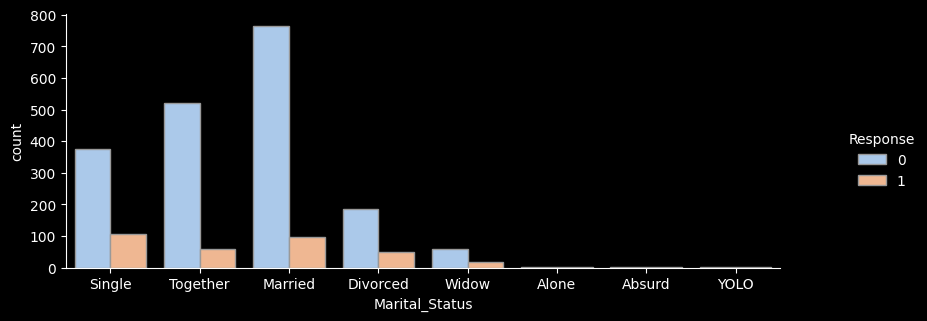

In [50]:
# 결혼여부에 따른 캠페인 반응률 분석
sns.catplot(x='Marital_Status', hue='Response', kind='count', palette='pastel', edgecolor='.6', data=df)
plt.gcf().set_size_inches(10, 3)

In [51]:
df_gp = df.groupby('Marital_Status')['Response'].agg(['count','sum'])
df_gp['ratio']= round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp.sort_values(by=['ratio'], ascending=False)

,count,sum,ratio
Marital_Status,,,
Absurd,2,1,50.0
YOLO,2,1,50.0
Alone,3,1,33.3
Widow,77,19,24.7
Single,480,106,22.1
Divorced,232,48,20.7
Married,864,98,11.3
Together,580,60,10.3


In [52]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2


In [53]:
# 새로운 파생변수 생성
df['cmp_sum'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2,0


## Session 3
## ML 활용 마케팅 반응고객 예측

### 모델링을 위한 데이터 준비
---

In [55]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1,0


In [56]:
# 새로운 파생변수 생성
df['mnt_sum'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum,mnt_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1,0,776


In [61]:
# 모델링을 학습하기 위한 X와 Y데이터 구분
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df.drop(['ID', 'Response','Z_CostContact', 'Z_Revenue','Dt_Customer_gp','Recency_gp'], axis=1)
Y=df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(1568, 27) (1568,)
(672, 27) (672,)


In [62]:
print(categorical_list)

['Education', 'Marital_Status']


In [63]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    print(col)
    le=LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Education
Marital_Status


In [64]:
x_test[categorical_list].head()

,Education,Marital_Status
855,2,4
1963,2,4
287,3,5
1705,4,3
748,2,4


### 모델 학습 및 평가
---

In [65]:
import lightgbm as lgb
# setting the parameters

d_train = lgb.Dataset(x_train, label=y_train)

params = {}
params [ 'learning_rate'] = 0.1
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for multi-class
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4
params ['seed'] = 23456

# 학습
clf = lgb.train (params, d_train, 500) # 500 epocs에서 모델 훈련

[LightGBM] [Info] Number of positive: 234, number of negative: 1334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149235 -> initscore=-1.740616
[LightGBM] [Info] Start training from score -1.740616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [67]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0, len(y_train)):
    if y_pred_train[i] >= 0.5:
        y_pred_train[i] = 1
    else:
        y_pred_train[i] = 0

y_pred_test = clf.predict(x_test)
for i in range(0, len(y_pred_test)):
    if y_pred_test[i] >= 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1334
           1       1.00      0.88      0.93       234

    accuracy                           0.98      1568
   macro avg       0.99      0.94      0.96      1568
weighted avg       0.98      0.98      0.98      1568

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       572
           1       0.66      0.45      0.54       100

    accuracy                           0.88       672
   macro avg       0.79      0.70      0.73       672
weighted avg       0.87      0.88      0.87       672



In [68]:
pd.Series(y_pred_test).value_counts()

0.0    604
1.0     68
Name: count, dtype: int64

In [69]:
# 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print('roc_score_train:', roc_score_train)
print('roc_score_test:', roc_score_test)

roc_score_train: 0.9989732697753687
roc_score_test: 0.8676573426573426


In [72]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

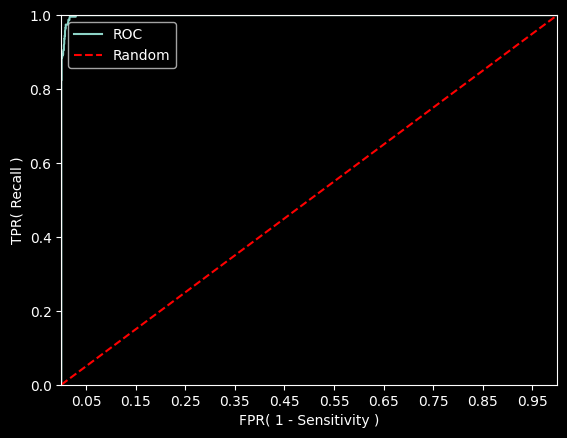

In [73]:
roc_curve_plot(y_train, y_pred_train_proba)

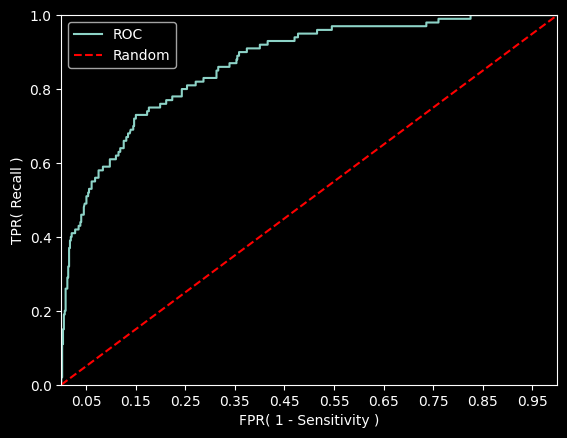

In [74]:
roc_curve_plot(y_test, y_pred_test_proba)

### 중요변수 파악
---

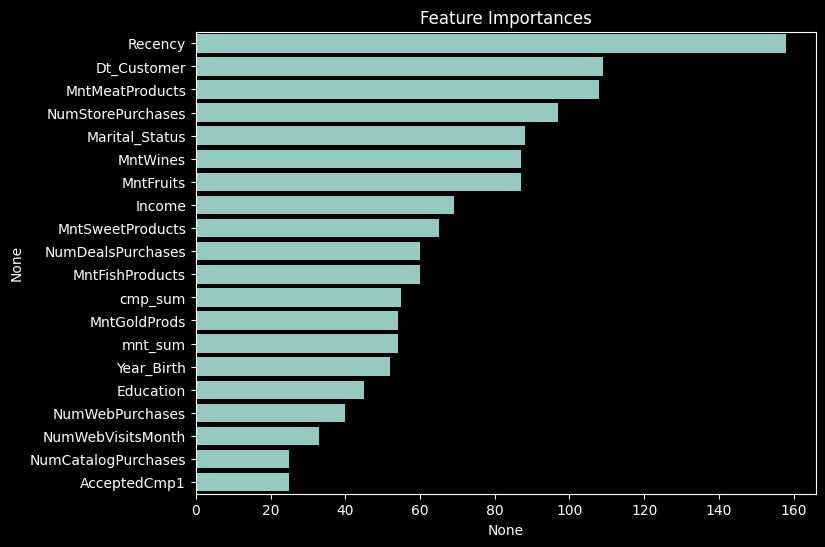

In [75]:
ftr_importances_values = clf.feature_importance() # Randomforest : feature_importance_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [76]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_gp', 'Recency_gp', 'cmp_sum', 'mnt_sum'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Density'>

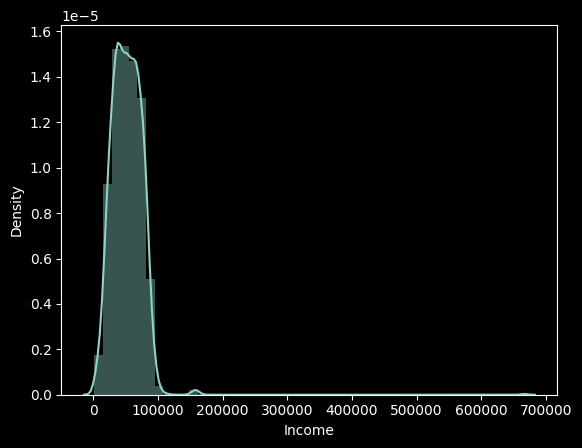

In [77]:
# distplot
sns.distplot(df['Income'])

In [79]:
# 변수해석 빠르게 하기
import numpy as np

val = 'Income'
sp1 = 30000
sp2 = 60000

# --------------------------------------------------
df['gp'] = np.where(df[val] <=sp1, 1,
                    np.where(df[val] <= sp2, 2, 3))

df_gp = df.groupby('gp')['Response'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp.sort_values(by=['ratio'], ascending=False)

,count,sum,ratio
gp,,,
3,841,181,21.5
2,1029,114,11.1
1,370,39,10.5


### 모델 저장

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(clf)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)